***Aluno: João Victor Andrade de Aquino Saraiva***

##**Implementar, utilizando grafos, o jogo dos jarros 🤖 🚰**:
Considerando que possuo dois jarros de água: um maior com capacidade para 4 litros e outro com capacidade para 3 litros e preciso medir 2 litros. O espaço de estados pode ser representado por dois inteiros x e y: x = litros no jarro de 4 litros e y = litros no jarro de 3 litros. Espaço de Estados = (x, y) tal que x ∈ {0,1,2,3,4}, y ∈ {0,1,2,3}. O estado inicial ocorre quando ambos os jarros estão vazios: (0,0) e o estado objetivo é qualquer estado que possua 2 litros de água no jarro de 4 litros: (2, n) para qualquer n.

Aplicar um algoritmo de busca (em largura ou em profundidade) para encontrar a solução.

Restrições:
* Não é possível colocar água em um jarro cheio.
* Restrições são associadas para que uma operação possa ser aplicada sobre um estado

O trabalho pode ser feito em, no máximo, 3 alunos. Pode ser feito em qualquer linguagem.



---



In [3]:
import time
import random

class node:

  def __init__(self,data):
    self.x=0
    self.y=0
    self.parent=data

  def __repr__(self):
    return "("+str(self.x)+","+str(self.y)+")"

"""
O problema tem algumas operações que podem ser feitas (Universo):
1°- Encher todo o jarro 1
2°- Encher todo o jarro 2
3°- Esvaziar o jarro 1
4°- Esvaziar o jarro 2
5°- Transferir o jarro 2 para o jarro 1, enchendo ele
6°- Transferir o jarro 1 para o jarro 2, enchendo ele
7°- Transferir o jarro 2 para o jarro 1, esvaziando ele
8°- Transferir o jarro 1 para o jarro 2, esvaziando ele

A árvore será construída usando essas operações, de acordo com o nó em que estiver
"""

def operation(cnode, rule):

    x = cnode.x
    y = cnode.y

    if rule == 1 :
      if x < maxjug1 :
        x = maxjug1
      else :
        return None

    elif rule == 2 :
      if y < maxjug2 :
        y = maxjug2
      else :
        return None

    elif rule == 3 :
      if x > 0:
        x = 0
      else :
        return None

    elif rule == 4 :
      if y > 0:
        y = 0
      else :
        return None

    elif rule == 5 :
      if x+y >= maxjug1 :
        y = y-(maxjug1-x)
        x = maxjug1
      else :
        return None

    elif rule == 6 :
      if x+y >= maxjug2 :
        x = x-(maxjug2-y)
        y = maxjug2
      else :
        return None

    elif rule == 7 :
      if x+y < maxjug1 :
        x = x+y
        y = 0
      else :
        return None

    elif rule == 8 :
      if x+y < maxjug2 :
        y = x+y
        x = 0
      else :
        return None

    if (x == cnode.x and y == cnode.y) :
      return None
    nextnode = node(cnode)
    nextnode.x = x
    nextnode.y = y
    nextnode.parent = cnode
    return nextnode

def isGoalNode(cnode, gnode) :
  if (cnode.x == gnode.x and cnode.y == gnode.y):
    return True
  return False

def printpath(cnode):
  temp = cnode
  list1=[]
  while(temp != None) :
    list1.append(temp)
    temp = temp.parent
  list1.reverse()
  for i in list1:
    print(str(i))
  print("Caminho Percorrido: ", len(list1))

class BfsAlgo :

  """
  BFS usa a estrutura de dados Queue (Fila)
  Constrói a "árvore" nível por nível
  FIFO (First In First Out)
  """

  def __init__(self) :
    self.bfsq = []

  def pushlist(self,list1):
    for m in list1:
      self.bfsq.append(m)

  def popnode(self) :
    if(self.is_empty(self.bfsq)) :
      return None
    else :
      return self.bfsq.pop(0)

  def is_empty(self,l) :
    return len(l) == 0

  def generateAllSuccessors(self, cnode) :
    list1 = []
    for rule in range (1,9) :
      nextnode = operation(cnode, rule)

      if nextnode != None :
        list1.append(nextnode)
    return list1

  def bfsMain(self, initialNode,GoalNode) :
    self.bfsq.append(initialNode)
    while not self.is_empty(self.bfsq) :
      visited_node = self.popnode()
      #print(str(visited_node))
      if isGoalNode(visited_node,GoalNode) :
        return visited_node
      successor_nodes = self.generateAllSuccessors(visited_node)
      #print("Sucessores: "+str(successor_node))
      self.pushlist(successor_nodes)
    return None

class DfsAlgo :

  """
  DFS usa estrutura de dados Stack (Pilha)
  Constrói a árvore subárvore por subárvore
  LIFO (Last In First Out)
  """

  def __init__(self) :
    self.dfsStack = []

  def pushNode(self,m) :
    self.dfsStack.append(m)

  def pushList(self,list1) :
    for m in list1 :
      self.dfsStack.append(m)

  def is_empty(self,l) :
    return len(l) == 0

  def popnode(self) :
    if(self.is_empty(self.dfsStack)) :
      return None
    else :
      return self.dfsStack.pop()

  def IsNodeInList(self,node,list1) :
      for m in list1 :
        if (node.x == m.x and node.y == m.y) :
          return True
      return False

  def generateRandomSuccessor(self,cnode,visitedNodeList) :
      list1 = []
      list_rule = []
      while len(list_rule) < 8 :
        rule_no = random.randint(1, 8)
        if (not rule_no in list_rule) :
          list_rule.append(rule_no)
          nextnode = operation(cnode,rule_no)
          if nextnode != None and not self.IsNodeInList(nextnode, visitedNodeList) :
            list1.append(nextnode)
      return list1

  def generateSequentialSuccessor(self,cnode) :
        list1 = []
        for rule in range (1,9):
          nextnode = operation(cnode,rule)
          if nextnode != None :
            list1.append(nextnode)
        list1.reverse()
        return list1

  def generateAllSuccessors(self,cnode,visitedNodeList) :
        list1 = self.generateRandomSuccessor(cnode,visitedNodeList)
        #list1 = self.generateSequentialSuccessor(cnode)
        return list1

  def dfsMain(self,initialNode,GoalNode) :
        visitedNodeList = []
        self.dfsStack.append(initialNode)
        while not self.is_empty(self.dfsStack) :
          visited_node = self.popnode()
          visitedNodeList.append(visited_node)
          #print("Nó(s) removido(s):")
          #print(str(visited_node))
          if isGoalNode(visited_node,GoalNode) :
            return visited_node
          successor_nodes = self.generateAllSuccessors(visited_node,visitedNodeList)
          #print("Nó Sucessor:")
          #successor_nodes.printnode()
          self.pushList(successor_nodes)
        return None

if __name__ == '__main__' :
  list2 = []

  #maxjug1=int(input("Qual o valor máximo do jarro 1:"))
  #maxjug2=int(input("Qual o valor máximo do jarro 2:"))
  maxjug1=4
  maxjug2=3
  initialNode = node(None)
  initialNode.x = 0
  initialNode.y = 0
  initialNode.parent = None
  GoalNode = node(None)
  #GoalNode.x = int(input("Qual o valor objetivo do jarro 1:"))
  GoalNode.x=2
  GoalNode.y = 0
  GoalNode.parent = None
  #print("maxjug1="+str(maxjug1)+", maxjug2="+str(maxjug2))
  print("...BFS Algorithm is running...")
  start_time = time.time()
  solutionNode = BfsAlgo().bfsMain(initialNode, GoalNode)
  end_time = time.time()
  if (solutionNode != None) :
    print("Solução encontrada usando o algoritmo BFS :")
    printpath(solutionNode)
  else :
    print("Solução não encontrada usando o algoritmo BFS .")
  diff = end_time - start_time
  print("Tempo de execução: ", diff*1000,"ms")
  print("...DFS Algorithm is running...")
  start_time = time.time()
  solutionNode = DfsAlgo().dfsMain(initialNode, GoalNode)
  end_time = time.time()
  if(solutionNode != None) :
    print("Solução encontrada usando o algoritmo DFS :")
    printpath(solutionNode)
  else :
    print("Solução não encontrada usando o algoritmo DFS .")
  diff2 = end_time - start_time
  print("Tempo de Execução:",diff2*1000,"ms")


...BFS Algorithm is running...
Solução encontrada usando o algoritmo BFS :
(0,0)
(0,3)
(3,0)
(3,3)
(4,2)
(0,2)
(2,0)
Caminho Percorrido:  7
Tempo de execução:  4.302024841308594 ms
...DFS Algorithm is running...
Solução encontrada usando o algoritmo DFS :
(0,0)
(0,3)
(3,0)
(3,3)
(4,3)
(4,0)
(1,3)
(1,0)
(0,1)
(4,1)
(2,3)
(2,0)
Caminho Percorrido:  12
Tempo de Execução: 0.48732757568359375 ms


In [4]:
!pip install matplotlib

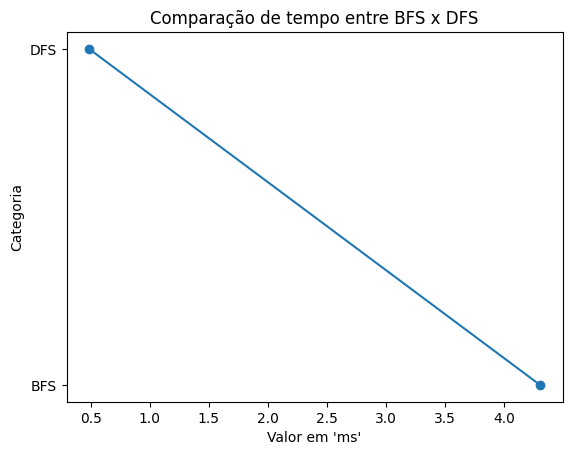

In [13]:
import matplotlib.pyplot as plt
import numpy as np

tempoBfs = diff*1000
tempoDfs = diff2*1000

categorias = ['BFS', 'DFS']
valores = [tempoBfs, tempoDfs]

plt.plot(valores, categorias, marker='o')

plt.title("Comparação de tempo entre BFS x DFS")
plt.ylabel("Categoria")
plt.xlabel("Valor em 'ms'")
plt.show()

Como podemos ver nos resultados, o algoritmo de profundidade nesse caso é bem mais eficiente para achar o melhor caminho dos nós, embora analisa mais nós.
🤖

Referências:

https://www.geeksforgeeks.org/difference-between-bfs-and-dfs/

https://www.cs.rochester.edu/u/nelson/courses/csc_173/assignments/02.html

https://www.w3schools.com/python/matplotlib_plotting.asp

https://medium.com/programadores-ajudando-programadores/os-grafos-e-os-algoritmos-697c1fd4a416